# Treasury bond rate

## Data download

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

https://finance.yahoo.com/bonds/

- ^IRX : 13 week Treasury Bill
- ^FVX : Treasury Yield 5 years
- ^TNX : Treasury Yield 10 years
- ^TYX : Treasury Yield 30 years

- Scale : %
- frequency : daily (B)

In [4]:
treasury_bonds = ["^IRX", "^FVX", "^TNX", "^TYX"]

tb = yf.Tickers(treasury_bonds)
df_tb = tb.history(period="max")["Close"]
df_tb.tail()

[*********************100%***********************]  4 of 4 completed


,^FVX,^IRX,^TNX,^TYX
Date,,,,
2023-08-25,4.433,5.315,4.239,4.294
2023-08-28,4.412,5.323,4.212,4.291
2023-08-29,4.277,5.320,4.122,4.237
2023-08-30,4.273,5.315,4.118,4.228
2023-08-31,4.244,5.298,4.093,4.204


In [7]:
df_tb.rename(columns={"^IRX":"13W", "^FVX":"5Y", "^TNX":"10Y", "^TYX":"30Y"}, inplace=True)
df_tb.tail()

,5Y,13W,10Y,30Y
Date,,,,
2023-08-25,4.433,5.315,4.239,4.294
2023-08-28,4.412,5.323,4.212,4.291
2023-08-29,4.277,5.320,4.122,4.237
2023-08-30,4.273,5.315,4.118,4.228
2023-08-31,4.244,5.298,4.093,4.204


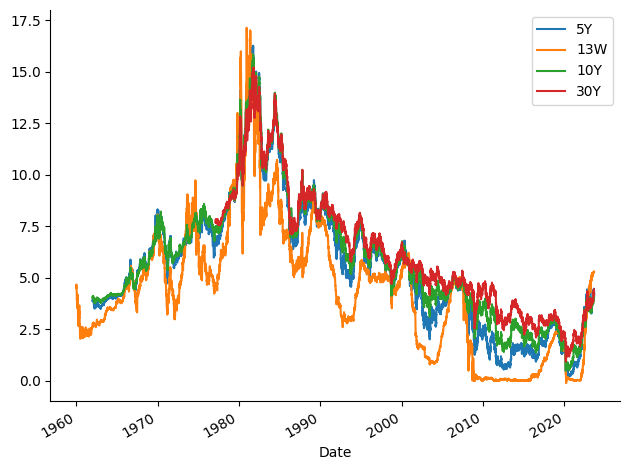

In [9]:
# plot graph
df_tb.plot()

plt.tight_layout()
sns.despine()

In [10]:
df_tb.corr()

,5Y,13W,10Y,30Y
5Y,1.000000,0.952831,0.992974,0.982719
13W,0.952831,1.000000,0.922176,0.910523
10Y,0.992974,0.922176,1.000000,0.996173
30Y,0.982719,0.910523,0.996173,1.000000


## Correlation with Tesla

In [14]:
tesla = yf.Ticker("TSLA")
df_tesla = tesla.history(period="max")[["Close"]]
df_tesla.tail()

,Close
Date,
2023-08-25 00:00:00-04:00,238.589996
2023-08-28 00:00:00-04:00,238.820007
2023-08-29 00:00:00-04:00,257.179993
2023-08-30 00:00:00-04:00,256.899994
2023-08-31 00:00:00-04:00,258.079987


In [17]:
# init date of Tesla
df_tesla.head()

,Close
Date,
2010-06-29 00:00:00-04:00,1.592667
2010-06-30 00:00:00-04:00,1.588667
2010-07-01 00:00:00-04:00,1.464000
2010-07-02 00:00:00-04:00,1.280000
2010-07-06 00:00:00-04:00,1.074000


In [21]:
df_tb = df_tb[df_tb.index >= "2010-06-29"]
df_tb.head()

,5Y,13W,10Y,30Y
Date,,,,
2010-06-29,1.786,0.160,2.967,3.946
2010-06-30,1.795,0.170,2.951,3.909
2010-07-01,1.795,0.165,2.927,3.868
2010-07-02,1.812,0.160,2.979,3.941
2010-07-06,1.760,0.160,2.932,3.892


In [24]:
# merge two DataFrames

df_tesla.index.dtype

datetime64[ns, America/New_York]

In [36]:
df_tesla.index = pd.to_datetime(df_tesla.index, utc=True).strftime("%Y-%m-%d")
df_tesla.head()

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


In [37]:
df_tb.index = pd.to_datetime(df_tb.index, utc=True).strftime("%Y-%m-%d")
df_tb.head()

,5Y,13W,10Y,30Y
Date,,,,
2010-06-29,1.786,0.160,2.967,3.946
2010-06-30,1.795,0.170,2.951,3.909
2010-07-01,1.795,0.165,2.927,3.868
2010-07-02,1.812,0.160,2.979,3.941
2010-07-06,1.760,0.160,2.932,3.892


In [39]:
df = pd.merge(df_tb, df_tesla, how="inner", left_index=True, right_index=True)
df.head()

,5Y,13W,10Y,30Y,Close
Date,,,,,
2010-06-29,1.786,0.160,2.967,3.946,1.592667
2010-06-30,1.795,0.170,2.951,3.909,1.588667
2010-07-01,1.795,0.165,2.927,3.868,1.464000
2010-07-02,1.812,0.160,2.979,3.941,1.280000
2010-07-06,1.760,0.160,2.932,3.892,1.074000


In [40]:
df.corr()

,5Y,13W,10Y,30Y,Close
5Y,1.000000,0.845130,0.873304,0.558143,0.252323
13W,0.845130,1.000000,0.601574,0.270127,0.315532
10Y,0.873304,0.601574,1.000000,0.886563,0.006551
30Y,0.558143,0.270127,0.886563,1.000000,-0.246455
Close,0.252323,0.315532,0.006551,-0.246455,1.000000


In [42]:
# Pearson correlation evaluation
import scipy.stats as stats

corr = stats.pearsonr(df["13W"], df["Close"])
corr

PearsonRResult(statistic=0.3155320545252404, pvalue=1.6533872189434185e-77)

### 13W treasury rate is not related to the 13W treasury bond rate.

- Null Hypothesis (p-value : 1.6533...)

# Federal funds rate

- Source : https://fred.stlouisfed.org/series/FEDFUNDS
- frequency : monthly
- path : './datasets/FEDFUNDS.csv'

In [43]:
df_fe = pd.read_csv('./datasets/FEDFUNDS.csv')
df_fe.head()

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [45]:
# adjust date to Tesla's DataFrame

df_fe = df_fe[df_fe["DATE"] >= "2010-06-01"]
df_fe.head()

,DATE,FEDFUNDS
671,2010-06-01,0.18
672,2010-07-01,0.18
673,2010-08-01,0.19
674,2010-09-01,0.19
675,2010-10-01,0.19


In [83]:
df.head()
df_tesla_new = df.iloc[:, -1:]

In [87]:
df_tesla_new.index = pd.to_datetime(df_tesla_new.index)
df_tesla_new.index.dtype

datetime64[ns, UTC]

In [93]:
df_tesla_new = df_tesla_new[df_tesla_new.index >= "2010-07-01"]
df_tesla_new

,Close
Date,
2010-07-01 00:00:00+00:00,1.464000
2010-07-02 00:00:00+00:00,1.280000
2010-07-06 00:00:00+00:00,1.074000
2010-07-07 00:00:00+00:00,1.053333
2010-07-08 00:00:00+00:00,1.164000
...,...
2023-08-25 00:00:00+00:00,238.589996
2023-08-28 00:00:00+00:00,238.820007
2023-08-29 00:00:00+00:00,257.179993


In [95]:
# change Tesla's frequency into monthly data

df_tesla_monthly = df_tesla_new.resample("M").last()
df_tesla_monthly.head()

,Close
Date,
2010-07-31 00:00:00+00:00,1.329333
2010-08-31 00:00:00+00:00,1.298667
2010-09-30 00:00:00+00:00,1.360667
2010-10-31 00:00:00+00:00,1.456000
2010-11-30 00:00:00+00:00,2.355333


In [98]:
df_fe.set_index("DATE", inplace=True)
df_fe.index = pd.to_datetime(df_fe.index, utc=True)
df_fe.head()

,FEDFUNDS
DATE,
2010-06-01 00:00:00+00:00,0.18
2010-07-01 00:00:00+00:00,0.18
2010-08-01 00:00:00+00:00,0.19
2010-09-01 00:00:00+00:00,0.19
2010-10-01 00:00:00+00:00,0.19


In [99]:
df_fe_merge = pd.merge(df_fe, df_tesla_new, how="inner", left_index=True, right_index=True)
df_fe_merge

,FEDFUNDS,Close
2010-07-01 00:00:00+00:00,0.18,1.464000
2010-09-01 00:00:00+00:00,0.19,1.363333
2010-10-01 00:00:00+00:00,0.19,1.373333
2010-11-01 00:00:00+00:00,0.19,1.427333
2010-12-01 00:00:00+00:00,0.18,2.290000
...,...,...
2022-12-01 00:00:00+00:00,4.10,194.699997
2023-02-01 00:00:00+00:00,4.57,181.410004
2023-03-01 00:00:00+00:00,4.65,202.770004
2023-05-01 00:00:00+00:00,5.06,161.830002


In [100]:
df_fe_merge.corr()

,FEDFUNDS,Close
FEDFUNDS,1.000000,0.216192
Close,0.216192,1.000000


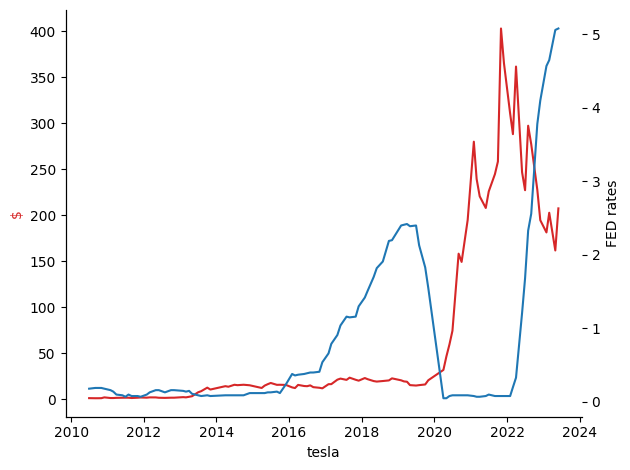

In [108]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('tesla')
ax1.set_ylabel('$', color=color)
ax1.plot(df_fe_merge.index, df_fe_merge["Close"], color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('FED rates')
ax2.plot(df_fe_merge.index, df_fe_merge["FEDFUNDS"], color=color)

fig.tight_layout()
sns.despine()

In [102]:
corr = stats.pearsonr(df_fe_merge["FEDFUNDS"], df_fe_merge["Close"])
corr

PearsonRResult(statistic=0.21619213350561575, pvalue=0.028282792309278895)

In [111]:
df_fe_merge_2016 = df_fe_merge[df_fe_merge.index >= "2016"]
df_fe_merge_2016.head()

,FEDFUNDS,Close
2016-02-01 00:00:00+00:00,0.38,13.129333
2016-03-01 00:00:00+00:00,0.36,12.423333
2016-04-01 00:00:00+00:00,0.37,15.839333
2016-06-01 00:00:00+00:00,0.38,14.637333
2016-07-01 00:00:00+00:00,0.39,14.433333


In [113]:
df_fe_merge_2016.corr()

,FEDFUNDS,Close
FEDFUNDS,1.000000,-0.032595
Close,-0.032595,1.000000


In [119]:
df_fe_merge["rolling_corr"] = df_fe_merge['Close'].rolling(12).corr(df_fe_merge['FEDFUNDS'])
df_fe_merge.head()

,FEDFUNDS,Close,rolling_corr
2010-07-01 00:00:00+00:00,0.18,1.464000,NaN
2010-09-01 00:00:00+00:00,0.19,1.363333,NaN
2010-10-01 00:00:00+00:00,0.19,1.373333,NaN
2010-11-01 00:00:00+00:00,0.19,1.427333,NaN
2010-12-01 00:00:00+00:00,0.18,2.290000,NaN


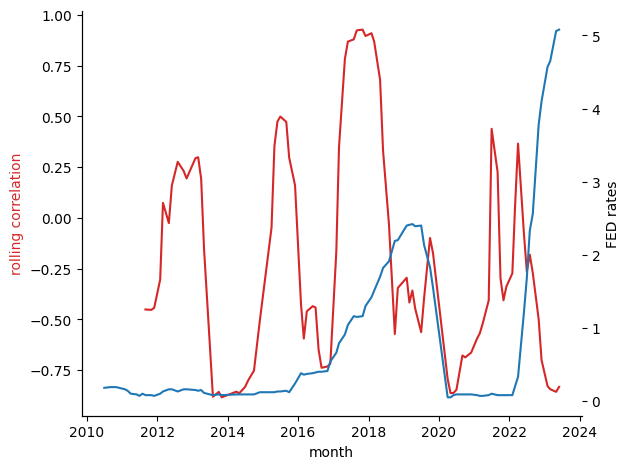

In [121]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('month')
ax1.set_ylabel('rolling correlation', color=color)
ax1.plot(df_fe_merge.index, df_fe_merge["rolling_corr"], color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('FED rates')
ax2.plot(df_fe_merge.index, df_fe_merge["FEDFUNDS"], color=color)

fig.tight_layout()
sns.despine()

In [124]:
drop_df = df_fe_merge.dropna()
corr = stats.pearsonr(drop_df["FEDFUNDS"], drop_df["rolling_corr"])
corr

PearsonRResult(statistic=-0.0994238392248944, pvalue=0.34571149540216467)

### FED funds rate is slightly related to Tesla price

- Alternative Hypothesis (p-value : 0.002828...)

# Tesla price change percentage

In [125]:
df.head()

,5Y,13W,10Y,30Y,Close
Date,,,,,
2010-06-29,1.786,0.160,2.967,3.946,1.592667
2010-06-30,1.795,0.170,2.951,3.909,1.588667
2010-07-01,1.795,0.165,2.927,3.868,1.464000
2010-07-02,1.812,0.160,2.979,3.941,1.280000
2010-07-06,1.760,0.160,2.932,3.892,1.074000


In [126]:
df_fe.head()

,FEDFUNDS
DATE,
2010-06-01 00:00:00+00:00,0.18
2010-07-01 00:00:00+00:00,0.18
2010-08-01 00:00:00+00:00,0.19
2010-09-01 00:00:00+00:00,0.19
2010-10-01 00:00:00+00:00,0.19


In [129]:
df_final = df.copy()
df_final.index = pd.to_datetime(df_final.index, utc=True)

df_final = pd.merge(df_final, df_fe, how="inner", left_index=True, right_index=True)
df_final.head()

,5Y,13W,10Y,30Y,Close,FEDFUNDS
2010-07-01 00:00:00+00:00,1.795,0.165,2.927,3.868,1.464000,0.18
2010-09-01 00:00:00+00:00,1.409,0.130,2.582,3.662,1.363333,0.19
2010-10-01 00:00:00+00:00,1.271,0.150,2.526,3.721,1.373333,0.19
2010-11-01 00:00:00+00:00,1.163,0.105,2.628,4.017,1.427333,0.19
2010-12-01 00:00:00+00:00,1.622,0.155,2.964,4.237,2.290000,0.18


In [131]:
df_final["percent"] = df_final["Close"].pct_change()
df_final.head()

,5Y,13W,10Y,30Y,Close,FEDFUNDS,percent
2010-07-01 00:00:00+00:00,1.795,0.165,2.927,3.868,1.464000,0.18,NaN
2010-09-01 00:00:00+00:00,1.409,0.130,2.582,3.662,1.363333,0.19,-0.068762
2010-10-01 00:00:00+00:00,1.271,0.150,2.526,3.721,1.373333,0.19,0.007335
2010-11-01 00:00:00+00:00,1.163,0.105,2.628,4.017,1.427333,0.19,0.039320
2010-12-01 00:00:00+00:00,1.622,0.155,2.964,4.237,2.290000,0.18,0.604391


In [132]:
df_final.corr()

,5Y,13W,10Y,30Y,Close,FEDFUNDS,percent
5Y,1.000000,0.836364,0.865706,0.543306,0.180876,0.828300,-0.269076
13W,0.836364,1.000000,0.583874,0.250560,0.241281,0.997624,-0.187921
10Y,0.865706,0.583874,1.000000,0.885427,-0.083016,0.579947,-0.262731
30Y,0.543306,0.250560,0.885427,1.000000,-0.337444,0.253015,-0.197120
Close,0.180876,0.241281,-0.083016,-0.337444,1.000000,0.216192,0.037904
FEDFUNDS,0.828300,0.997624,0.579947,0.253015,0.216192,1.000000,-0.192250
percent,-0.269076,-0.187921,-0.262731,-0.197120,0.037904,-0.192250,1.000000


In [135]:
final_drop = df_final.dropna()
corr = stats.pearsonr(final_drop["percent"], final_drop["FEDFUNDS"])
corr

PearsonRResult(statistic=-0.19225017124946644, pvalue=0.052892170098470796)

In [137]:
corr = stats.pearsonr(final_drop["percent"], final_drop["13W"])
corr

PearsonRResult(statistic=-0.18792148699390937, pvalue=0.05856953266379307)

In [139]:
corr = stats.pearsonr(final_drop["percent"], final_drop["5Y"])
corr

PearsonRResult(statistic=-0.26907615649963373, pvalue=0.006244242874807672)

In [141]:
corr = stats.pearsonr(final_drop["percent"], final_drop["10Y"])
corr

PearsonRResult(statistic=-0.2627305625153189, pvalue=0.007635304798513546)

In [142]:
corr = stats.pearsonr(final_drop["percent"], final_drop["30Y"])
corr

PearsonRResult(statistic=-0.19711958994682532, pvalue=0.04705510119260922)

### Good job!
이자율과 가격변화율 간에 유의미한 약한 음의 상관관계
5Y > 10Y > 30Y > FED > 13W

In [143]:
df_daily = df.copy()
df_daily.head()

,5Y,13W,10Y,30Y,Close
Date,,,,,
2010-06-29,1.786,0.160,2.967,3.946,1.592667
2010-06-30,1.795,0.170,2.951,3.909,1.588667
2010-07-01,1.795,0.165,2.927,3.868,1.464000
2010-07-02,1.812,0.160,2.979,3.941,1.280000
2010-07-06,1.760,0.160,2.932,3.892,1.074000


In [144]:
df_daily["percent"] = df_daily["Close"].pct_change()
df_daily.head()

,5Y,13W,10Y,30Y,Close,percent
Date,,,,,,
2010-06-29,1.786,0.160,2.967,3.946,1.592667,NaN
2010-06-30,1.795,0.170,2.951,3.909,1.588667,-0.002511
2010-07-01,1.795,0.165,2.927,3.868,1.464000,-0.078473
2010-07-02,1.812,0.160,2.979,3.941,1.280000,-0.125683
2010-07-06,1.760,0.160,2.932,3.892,1.074000,-0.160937


In [146]:
df_daily.dropna(inplace=True)

In [153]:
df_daily.columns[df_daily.columns != ("Close", "percent")]

Index(['5Y', '13W', '10Y', '30Y', 'Close', 'percent'], dtype='object')

In [156]:
for column in df_daily.columns[df_daily.columns != ("Close", "percent")]:
    corr = stats.pearsonr(df_daily["percent"], df_daily[column])
    print(column, corr)

5Y PearsonRResult(statistic=-0.04391192092130989, pvalue=0.011478722006009056)
13W PearsonRResult(statistic=-0.014560608374663544, pvalue=0.40213330220045934)
10Y PearsonRResult(statistic=-0.044070396184509746, pvalue=0.011183618481273343)
30Y PearsonRResult(statistic=-0.030598779634316002, pvalue=0.07824303789034436)
Close PearsonRResult(statistic=0.008884213841361534, pvalue=0.6092245945782123)
percent PearsonRResult(statistic=1.0, pvalue=0.0)


df_daily.columns[df_daily.columns != ["Close", "percent"]]

In [ ]:
#
10Y > 5Y 유의미한 음의 상관관계